# 02 - Hückel Molecular Orbital Theory

This tutorial is part of the [Quantum Chemistry Foundations](https://github.com/fevangelista/Quantum-Chemistry-Foundations) series.

Francesco A. Evangelista

---

In this tutorial you will explore the basics of molecular orbital theory, the concept of basis, and use some linear algebra algorithms that are part of many quantum chemistry methods

## Introduction and theory

### Concepts

- Hückel molecular orbital theory describes $\pi$ electrons in planar organic molecules. For example, ethylene.

- MO theory. The molecular orbitals can be espressed as a linear combination of atomic orbitals (AOs).
$$
|\psi_i \rangle = \sum_\mu^\mathrm{AO} |\chi_\mu\rangle c_{\mu i} = |\chi_0\rangle c_{0 i} + |\chi_1\rangle c_{1 i} + \ldots
$$

- The basic assumption of Hückel theory is that the orbitals satisfy a one-electron Schrödinger equation
$$
\hat{h} \psi_i = \epsilon_i \psi_i
$$
where the matrix elements of the Hamiltonian ($\hat{h}$) are given by
$$
\langle \psi_i | \hat{h} | \psi_j \rangle = \int d\mathbf{r} \; \psi_i^*(\mathbf{r})  \hat{h}  \psi_j(\mathbf{r}) = 
\begin{cases}
\alpha & i = j \\
\beta & \text{if atoms $i$ and $j$ are adjacent} \\
0  & \text{otherwise}
\end{cases}
$$

We also assume that
$$
\langle \chi_\mu | \chi_\nu \rangle = \delta_{\mu \nu} = \begin{cases}
1 & i = j \\
0 & \text{otherwise}
\end{cases}
$$

- Example, C2H4 molecule

## Coding

### Imports

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
# display output of plotting commands inline 
%matplotlib inline 
# generate high resolution plots
%config InlineBackend.figure_format='retina'

In [3]:
a = np.array([1,2,3])
b = np.array([4,5,6])
a,b

(array([1, 2, 3]), array([4, 5, 6]))

In [4]:
a[1:]

array([2, 3])

In [5]:
A = np.array([[1,2,3],[4,5,6]])
A

array([[1, 2, 3],
       [4, 5, 6]])

In [6]:
with np.printoptions(precision=3, suppress=True):
    print(A)

[[1 2 3]
 [4 5 6]]


In [7]:
# Principles
# 1. Code incrementally
# 2. Test often
# 3. Avoid early optimization

### Reading the coordinates from a file

structure of a xyz file
```
N

<atom1 symbol> <atom1 x> <atom1 y> <atom1 z>
<atom2 symbol> <atom2 x> <atom2 y> <atom2 z>
...
<atomN symbol> <atomN x> <atomN y> <atomN z>
```

In [8]:
!cat ethylene.xyz

6

C        0.5897992921      0.8910088584     -0.0000000000                 
C        1.9255867815      0.8910088584      0.0000000000                 
H        2.4854727859      1.8209660408      0.0000000000                 
H        2.4854727859     -0.0389483240     -0.0000000000                 
H        0.0299132877      1.8209660408     -0.0000000000                 
H        0.0299132877     -0.0389483240      0.0000000000                 

In [9]:
def read_geometry(filename):
    coords = []
    lines = open(filename, "r").readlines()[2:]
    for line in lines:
        parts = line.split()
        if len(parts) >= 4:
            symbol = parts[0]
            xyz = np.array([float(x) for x in parts[1:4]])
            coords.append((symbol, xyz)) if symbol == "C" else None
    return coords

coords = read_geometry("ethylene.xyz")
coords

[('C', array([ 0.58979929,  0.89100886, -0.        ])),
 ('C', array([1.92558678, 0.89100886, 0.        ]))]

### Build the Huckel Hamiltonian

In [10]:
def build_huckel_hamiltonian(coords, r_cutoff=1.5, alpha=0.0, beta=-1.0):
    N = len(coords)
    H = np.zeros((N, N))
    for i, (_, xyz1) in enumerate(coords):
        for j, (_, xyz2) in enumerate(coords):
            distance = np.linalg.norm(xyz1 - xyz2)
            if distance < r_cutoff:
                if i == j:
                    H[i, i] == alpha
                else:
                    H[i, j] = beta
    return H

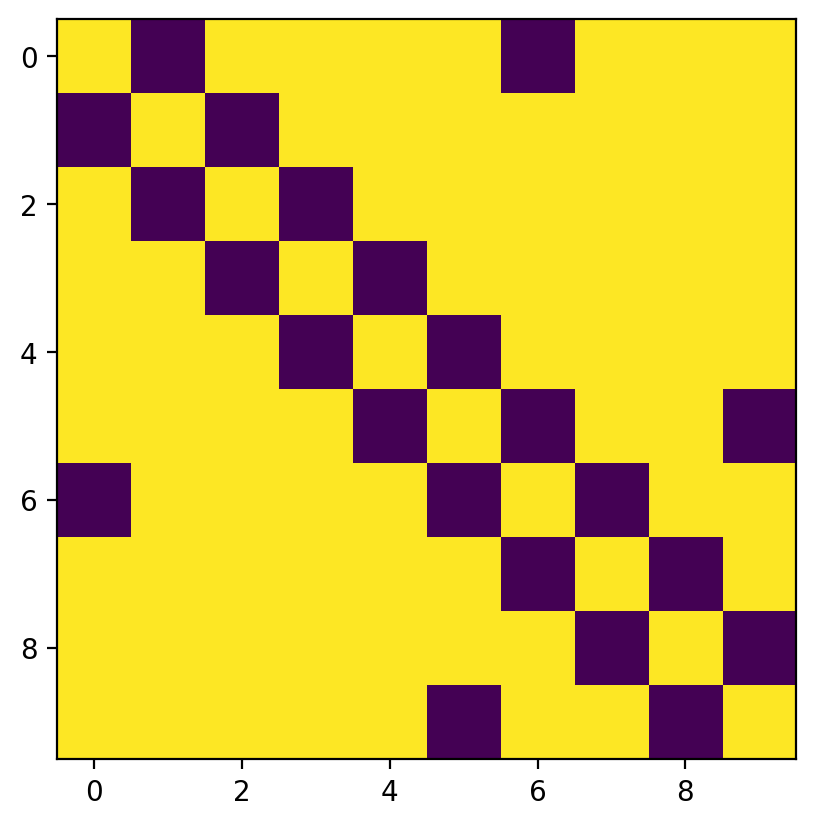

In [11]:
coords = read_geometry("azulene.xyz")
H = build_huckel_hamiltonian(coords, r_cutoff=1.54)
plt.imshow(H)

### Diagonalize the Hamiltonian

In [12]:
energies, c = np.linalg.eigh(H)
print(f"{energies = }")
print(f"c = \n{str(c)}")

energies = array([-2.31027685, -1.65157231, -1.35567429, -0.88697524, -0.47726   ,
        0.40039232,  0.73764031,  1.5792181 ,  1.86921398,  2.09529399])
c = 
[[-2.88639908e-01 -1.90899630e-01 -4.84057274e-01 -2.18557775e-01
   1.60119398e-01 -4.69935985e-01 -3.57060155e-01 -8.43570010e-02
   3.23296923e-01 -3.35497212e-01]
 [-1.99808914e-01 -4.33267002e-01 -3.57060155e-01  1.59778573e-01
   3.35497212e-01 -1.02277651e-01  4.84057274e-01  2.69710597e-01
  -4.04502640e-01  1.60119398e-01]
 [-1.72974001e-01 -5.24672155e-01  5.13478149e-16  3.60277414e-01
   4.44089210e-16  5.10887171e-01  1.11022302e-16 -3.41574856e-01
   4.32805067e-01 -4.99600361e-16]
 [-1.99808914e-01 -4.33267002e-01  3.57060155e-01  1.59778573e-01
  -3.35497212e-01 -1.02277651e-01 -4.84057274e-01  2.69710597e-01
  -4.04502640e-01 -1.60119398e-01]
 [-2.88639908e-01 -1.90899630e-01  4.84057274e-01 -2.18557775e-01
  -1.60119398e-01 -4.69935985e-01  3.57060155e-01 -8.43570010e-02
   3.23296923e-01  3.35497212e-01]
 [-4

In [13]:
c.T @ H @ c

array([[-2.31027685e+00,  3.91517819e-16,  5.11758735e-16,
         2.72814240e-16,  4.05104421e-16,  1.92097857e-16,
        -2.19532782e-16,  2.74140563e-16, -3.12236316e-16,
        -2.96733746e-16],
       [ 3.62961850e-16, -1.65157231e+00,  4.85878178e-17,
         2.02718611e-16,  2.46953779e-16,  3.88801386e-16,
        -3.09997956e-16, -2.78252573e-16,  1.77864842e-16,
         7.12635240e-17],
       [ 5.66828770e-16,  6.14156146e-17, -1.35567429e+00,
        -1.22175687e-16, -6.89566092e-17, -1.32974999e-16,
         2.91315687e-16,  2.64699635e-16, -2.80366604e-16,
         4.48795984e-16],
       [ 9.80170329e-17,  2.69675557e-16, -1.35926050e-16,
        -8.86975242e-01, -1.05772754e-16, -3.41902436e-16,
         2.83967431e-16,  2.19009112e-16, -3.89345099e-17,
         4.97749366e-17],
       [ 3.96908117e-16,  2.88002356e-16, -2.31830008e-17,
        -7.59778183e-17, -4.77259996e-01,  1.19028854e-16,
        -4.24946989e-16,  2.06746344e-16,  3.55444154e-16,
        -1.

$$
g(x,x_0,\zeta) = \sqrt{\frac{\zeta}{\pi}} \exp\left(-\zeta (x-x_0)^2\right)
$$

$$
\psi_i(x,y) = \sum_\mu \chi_\mu(x,y) C_{\mu i}
$$

$$
\chi_\mu(x,y) \approx G(x,y,x_\mu,y_\mu,\zeta) =g(x,x_\mu,\zeta)g(y,y_\mu,\zeta) = \frac{\zeta}{\pi} \exp\left(-\zeta (x-x_\mu)^2 - \zeta (y-y_\mu)^2\right)
$$

In [14]:
x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)

In [15]:
X, Y = np.meshgrid(x,y)

In [16]:
def gaussian(x,y,x0,y0,coeff,zeta=0.5):
    return (coeff * zeta / np.pi) * np.exp(-zeta *((x-x0)**2 + (y-y0)**2))

In [17]:
Z = gaussian(X,Y,-0.7,0.0,-0.70710678) + gaussian(X,Y,0.7,0.0,0.70710678)

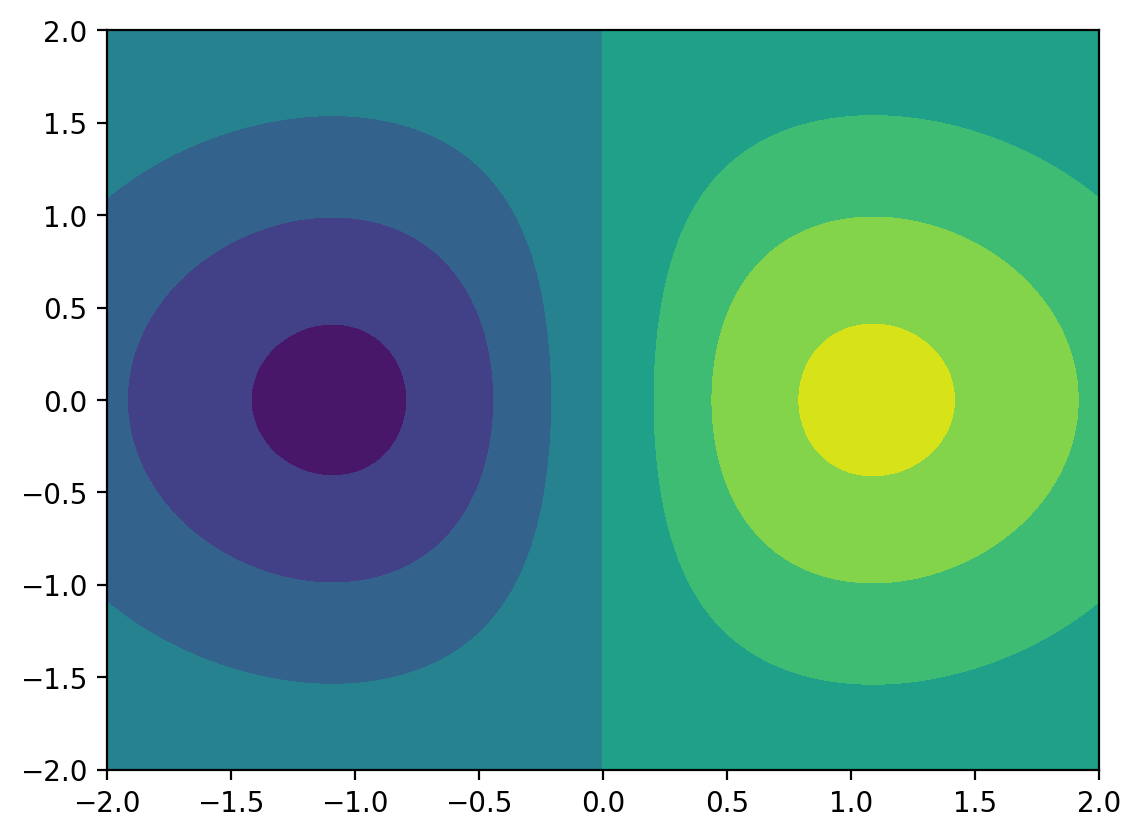

In [18]:
plt.contourf(X,Y,Z)

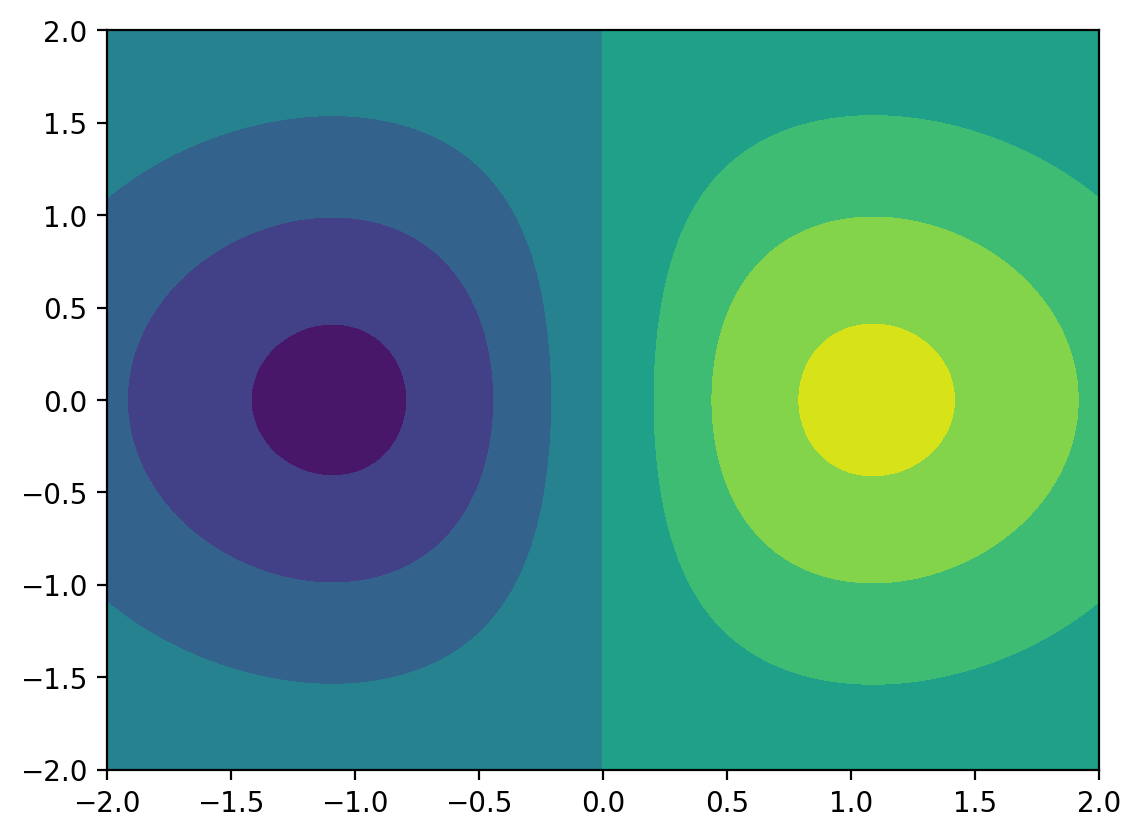

In [19]:
x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)

X, Y = np.meshgrid(x,y)

def gaussian(x,y,x0,y0,coeff,zeta=0.5):
    return (coeff * zeta / np.pi) * np.exp(-zeta *((x-x0)**2 + (y-y0)**2))

Z = gaussian(X,Y,-0.7,0.0,-0.70710678) + gaussian(X,Y,0.7,0.0,0.70710678)

plt.contourf(X,Y,Z)

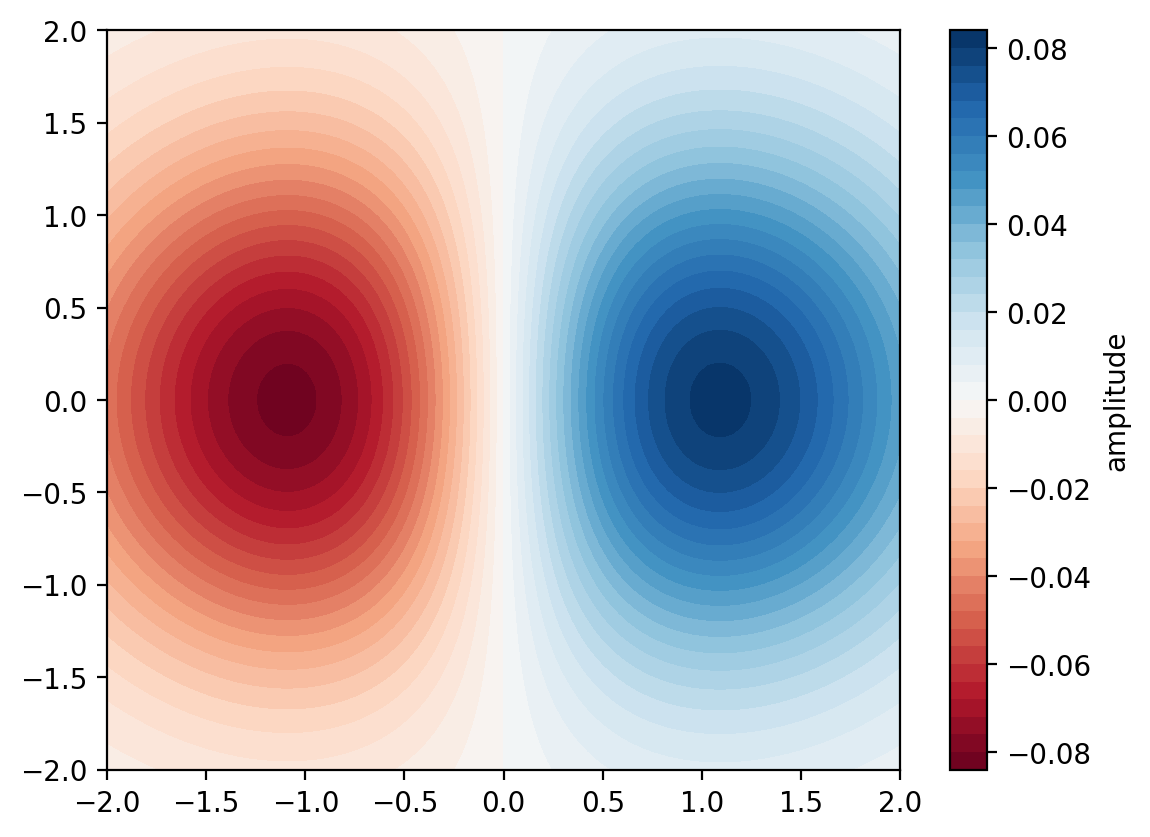

In [20]:
x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)

X, Y = np.meshgrid(x, y)

def gaussian(x, y, x0, y0, coeff, zeta=0.5):
    return (zeta * coeff / np.pi) * np.exp(-zeta * ((x-x0)**2 + (y-y0)**2))

Z =  -0.70710678 * gaussian(X, Y, -0.7, 0.,1.0) + 0.70710678 * gaussian(X, Y, 0.7, 0.,1.0)
plt.contourf(X,Y,Z, levels=50,cmap="RdBu")

# make the contour plot
plt.contourf(X, Y, Z, levels=50, cmap="RdBu")  # use RdBu colormap
plt.colorbar(label="amplitude")

In [21]:
coords = read_geometry("azulene.xyz")
H = build_huckel_hamiltonian(coords, r_cutoff=1.54)
energies, c = np.linalg.eigh(H)

class MOPlot:
    def __init__(self, coords, C):
        self.coords = coords
        self.C = C

    def plot_mo(self, i):
        # define a Gaussian function
        def gaussian(x, y, x0, y0, zeta=1.5):
            return (zeta / np.pi) * np.exp(-zeta * ((x - x0) ** 2 + (y - y0) ** 2))

        Ci = self.C[:, i]

        print(list(zip(self.coords, Ci)))
        
        # a list that collects the (x,y) position and coefficient of the atomic orbitals
#         AOs = [(xyz[0], xyz[1], Cmu) for (_, xyz), Cmu in zip(self.coords, Ci)]
        
#         x_values = [x for (x, _, _) in AOs]
#         y_values = [y for (_, y, _) in AOs]

#         # find the minimum and maximum of x and y
#         padding = 1.5
#         min_x = min(x_values) - padding
#         max_x = max(x_values) + padding
#         min_y = min(y_values) - padding
#         max_y = max(y_values) + padding

#         # create a grid of points where the Gaussian will be evaluated
#         x = np.linspace(min_x, max_x, 100)
#         y = np.linspace(min_y, max_y, 100)
#         X, Y = np.meshgrid(x, y)

#         # compute the sum of the Gaussians at each point in the grid and find the z range
#         Z = sum(Cmu * gaussian(X, Y, x0, y0) for (x0, y0, Cmu) in AOs)
#         z_range = max(np.abs(Z.max()), np.abs(Z.min()))

#         # make the contour plot
#         plt.contourf(X, Y, Z, levels=50, cmap="RdBu", vmin=-z_range, vmax=z_range)

#         # show the plot
#         plt.show()
        
moplot = MOPlot(coords,c)
moplot.plot_mo(5)

[(('C', array([0.77275342, 2.20806955, 0.        ])), -0.46993598517095886), (('C', array([-0.34616342,  1.4717879 ,  0.        ])), -0.10227765063711558), (('C', array([-0.48701869,  0.03265953,  0.        ])), 0.5108871712942924), (('C', array([ 0.45321762, -0.92192761,  0.        ])), -0.10227765063711491), (('C', array([ 1.89244699, -0.79448115,  0.        ])), -0.46993598517095914), (('C', array([2.61475876, 0.33277159, 0.        ])), 0.2904364113723191), (('C', array([2.11986876, 1.70843615, 0.        ])), 0.2904364113723193), (('C', array([3.22417219, 2.49027626, 0.        ])), 0.06321106438322452), (('C', array([4.42086522, 1.6678886 , 0.        ])), -0.315745636276162), (('C', array([4.06892985, 0.3717032 , 0.        ])), 0.06321106438322485)]


In [22]:
coords = read_geometry('benzene.xyz')
H = build_huckel_hamiltonian(coords)
energies, C = np.linalg.eigh(H)

### Plotting the molecular orbitals

In [23]:
class MOPlot:
    """A class to plot molecular orbitals from a Huckel computation on a planar molecule.
    The molecule is assumed to lie on the xy plane.

    Parameters
    ----------
    coords: list[str,np.array]
        A list of tuples (symbol, xyz)
    C: np.array
        The MO coefficient matrix

    """

    def __init__(self, coords, C):
        self.coords = coords
        self.C = C

    def plot_mo(self, i):
        """Plot the i-th (zero-based) MO"""

        Ci = self.C[:, i]

        # a list that collects the (x,y) position and coefficient of the atomic orbitals
        AOs = [(xyz[0], xyz[1], Cmu) for (_, xyz), Cmu in zip(self.coords, Ci)]

        x_values = [x for (x, _, _) in AOs]
        y_values = [y for (_, y, _) in AOs]

        # find the minimum and maximum of x and y
        padding = 1.5
        min_x = min(x_values) - padding
        max_x = max(x_values) + padding
        min_y = min(y_values) - padding
        max_y = max(y_values) + padding

        # create a grid of points where the Gaussian will be evaluated
        x = np.linspace(min_x, max_x, 100)
        y = np.linspace(min_y, max_y, 100)
        X, Y = np.meshgrid(x, y)

        # define a Gaussian function
        def gaussian(x, y, x0, y0, zeta=1.5):
            return (zeta / np.pi) * np.exp(-zeta * ((x - x0) ** 2 + (y - y0) ** 2))

        # compute the sum of the Gaussians at each point in the grid and find the z range
        Z = sum(Cmu * gaussian(X, Y, x0, y0) for (x0, y0, Cmu) in AOs)
        z_range = max(np.abs(Z.max()), np.abs(Z.min()))

        # fix the x and y range and preserve the x/y aspect ratio
        plt.xlim(min_x, max_x)
        plt.ylim(min_y, max_y)
        plt.axis("equal")

        # make the contour plot
        plt.contourf(X, Y, Z, levels=50, cmap="RdBu", vmin=-z_range, vmax=z_range)
        plt.colorbar(label="amplitude")

        # mark the atoms
        plt.scatter(x_values, y_values, color="black")

        # show the plot
        plt.show()

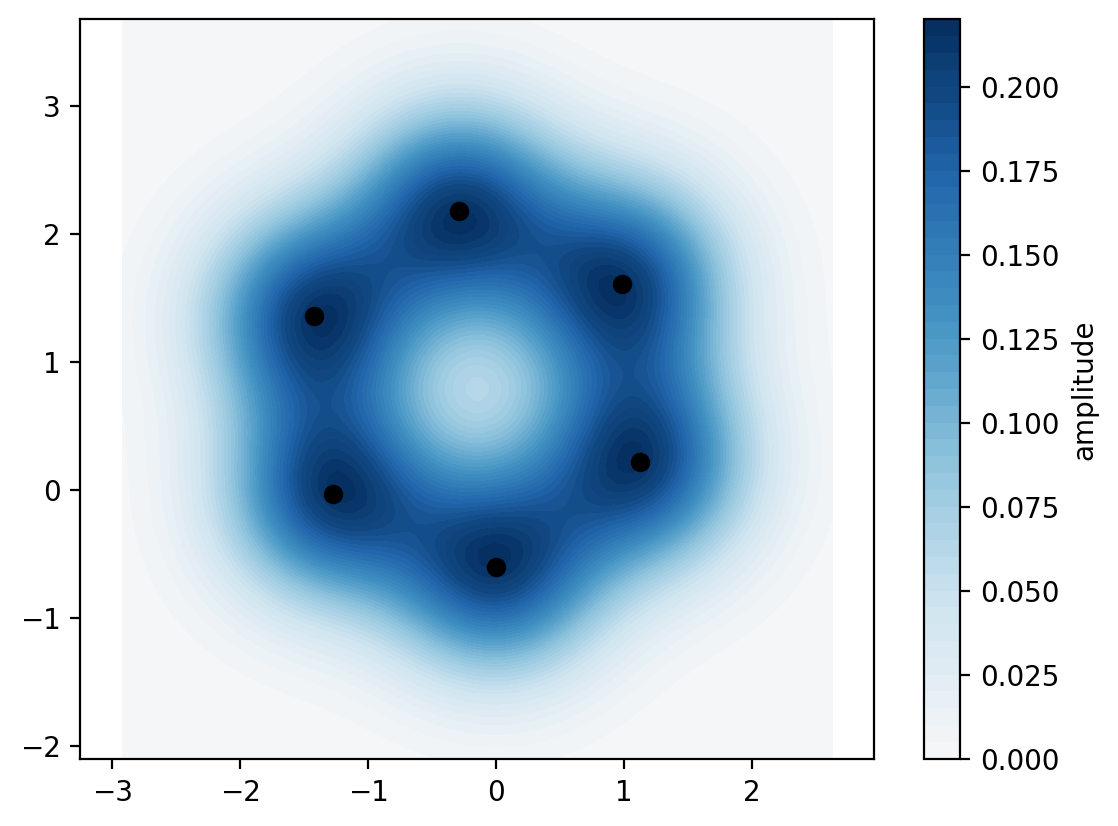

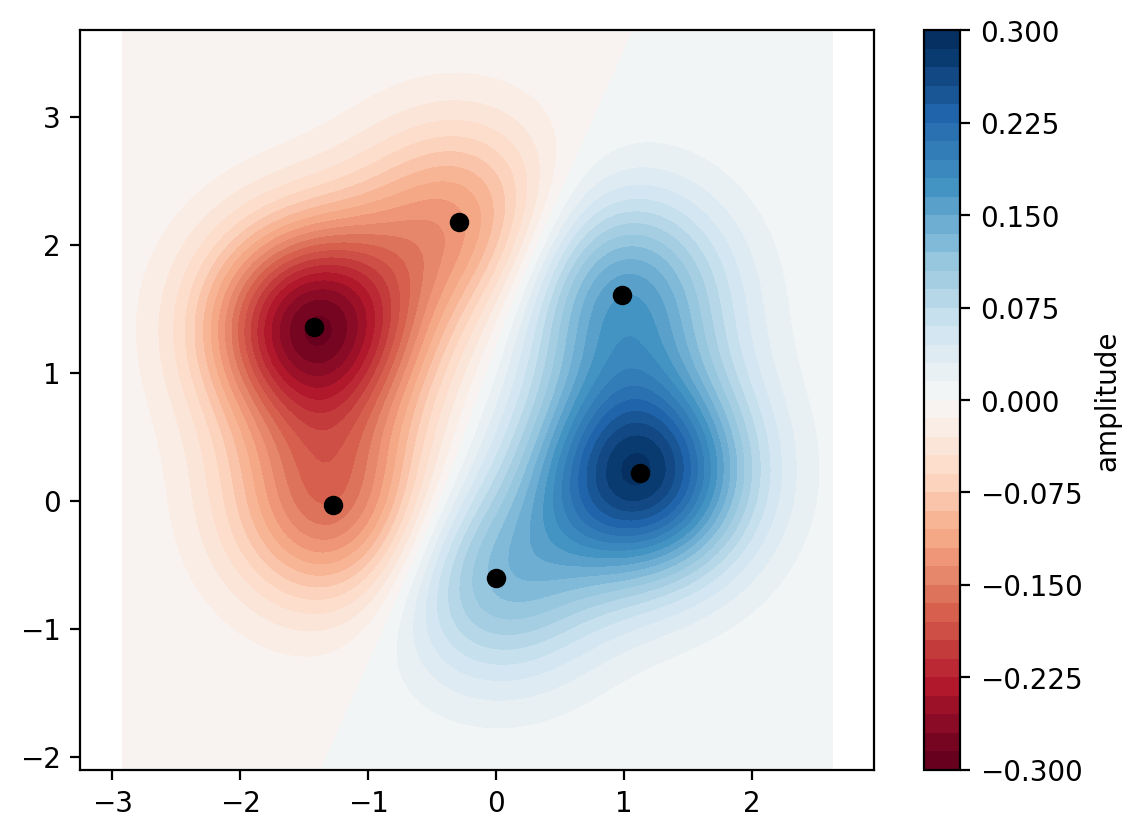

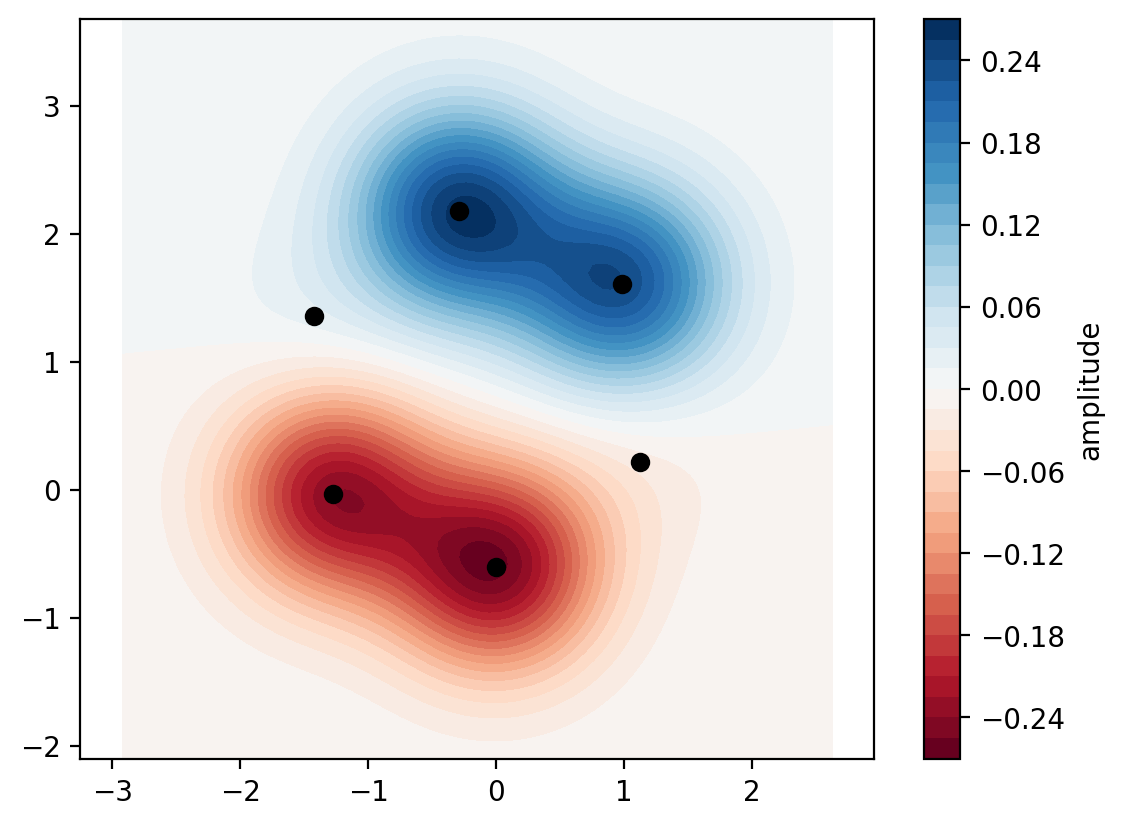

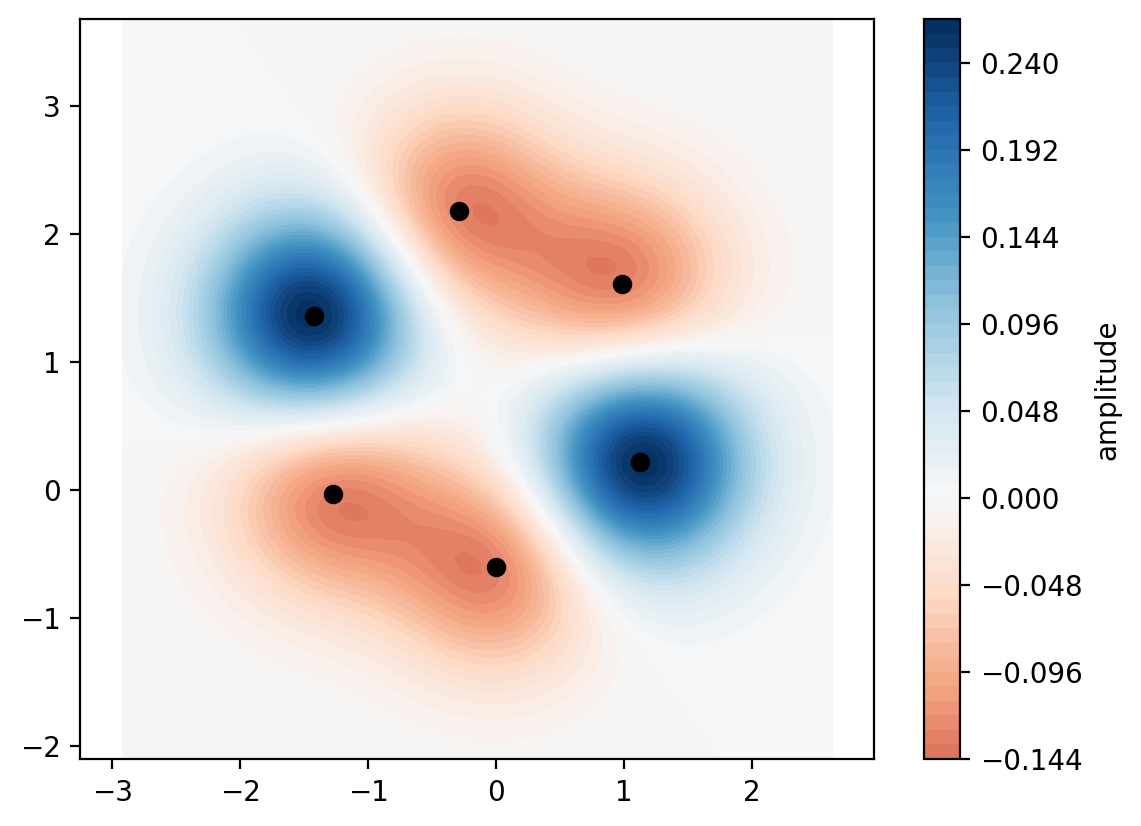

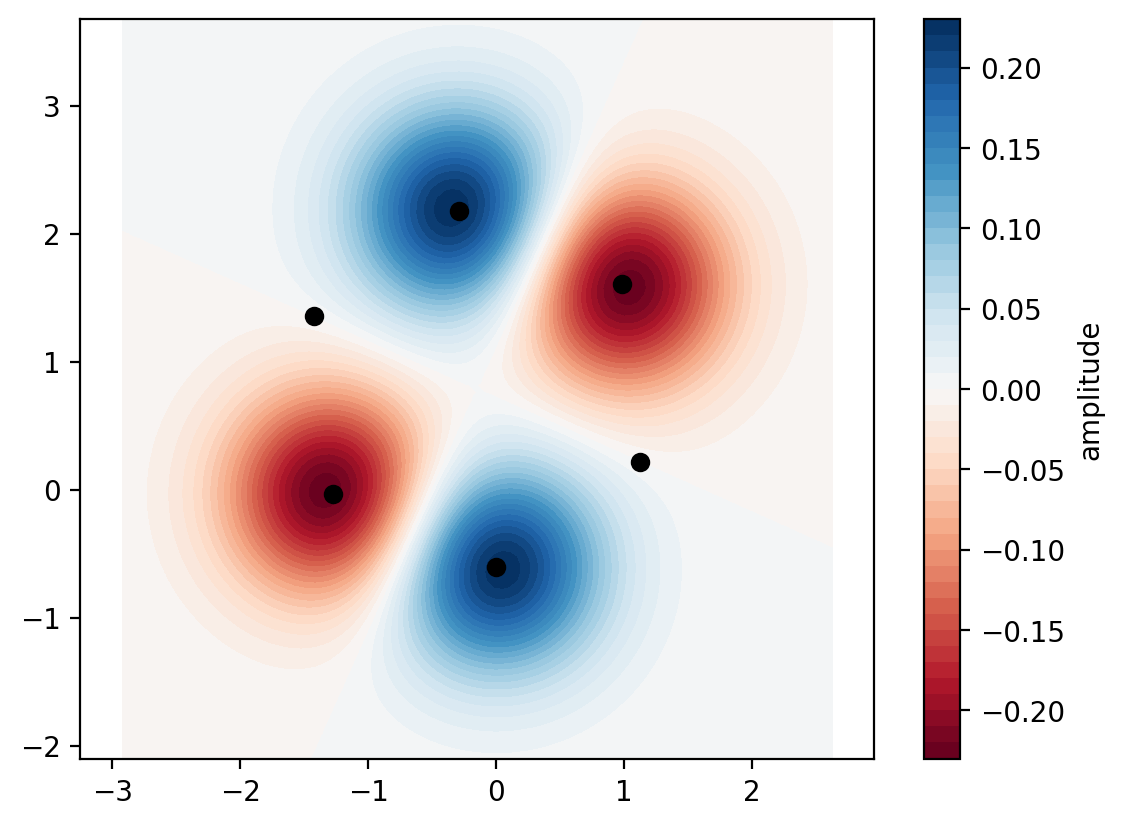

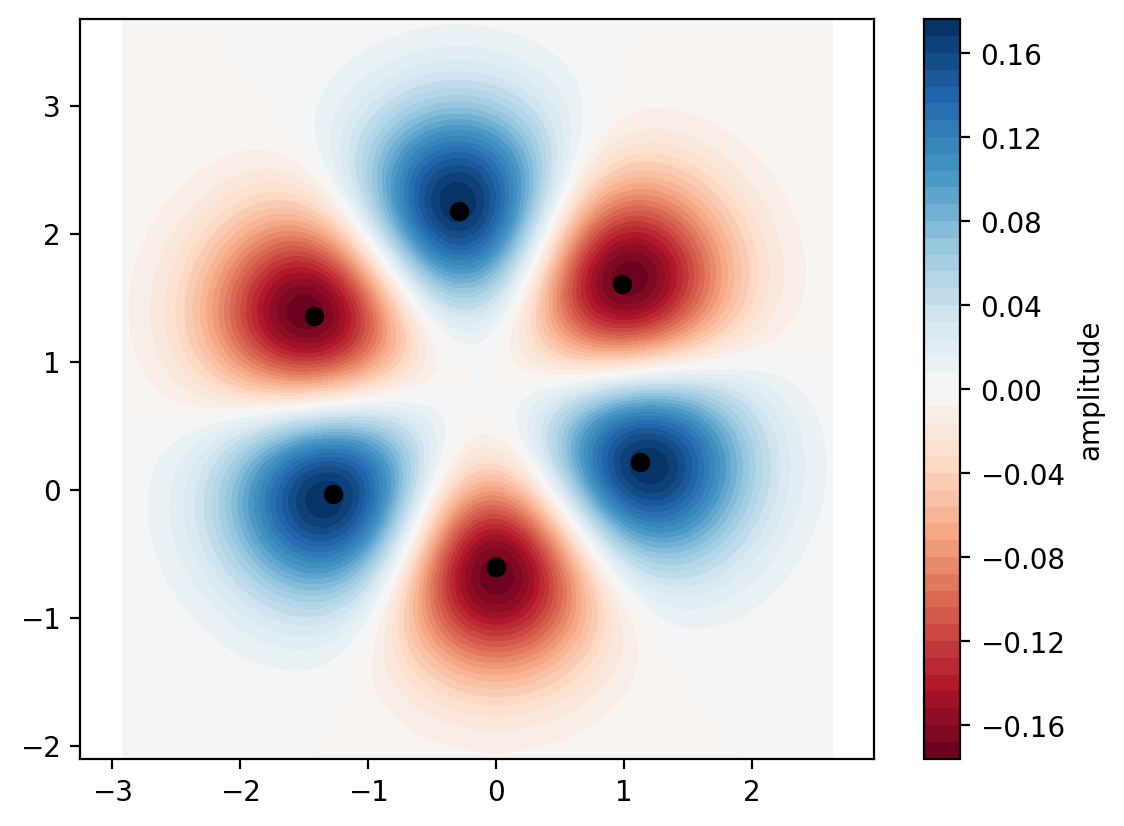

In [24]:
coords = read_geometry('benzene.xyz')
H = build_huckel_hamiltonian(coords)
energies, C = np.linalg.eigh(H)
moplot = MOPlot(coords, C)
for i in range(len(coords)):
    moplot.plot_mo(i)

Iteration 1 of Huckel class

In [146]:
class Huckel:
    def __init__(self, filename, charge=0):
        self.filename = filename
        self.charge = charge
        self.coords = self.read_geometry(self.filename)
        # number of basis functions
        self.N = len(self.coords)
        # number of electrons (only valid for C atoms)
        self.nel = self.N - charge
        
    def read_geometry(self, filename):
        coords = []
        lines = open(filename,'r').readlines()[2:]
        for line in lines:
            parts = line.split()
            symbol = parts[0]
            xyz = np.array([float(x) for x in parts[1:4]])
            coords.append((symbol, xyz)) if symbol == 'C' else None
        return coords
    
    def build_huckel_hamiltonian(self, coords, r_cutoff=1.5, alpha=-11.4, beta=-0.8):
        # the Hamiltonian
        H = np.zeros((self.N,self.N))
        for m in range(self.N):
            for n in range(self.N):
                if m == n:
                    H[m,n] = alpha
                else:
                    # let's find the distance between atoms m and n
                    _, xyz1 = coords[m]
                    _, xyz2 = coords[n]
                    distance = np.linalg.norm(xyz1 - xyz2)
                    if distance < r_cutoff:
                        H[m,n] = beta
        return H
    
    def run(self):
        # build the Hamiltonian
        self.H = self.build_huckel_hamiltonian(self.coords)
        
        # diagonalize the Hamiltonian
        self.energies, self.C = np.linalg.eigh(self.H)
        
        # compute the occupation vector
        self.occ = np.zeros([self.N])
        ndocc = self.nel // 2
        nsocc = self.nel % 2
        self.occ[:ndocc] = 2
        self.occ[ndocc:ndocc+nsocc] = 1
        
        self.energy = np.dot(self.energies,self.occ)
        
        # print information
        self.print_information()    
        
        self.mulliken_analysis()
        
    def print_information(self):
        print("==> Huckel calculation <==")
        print(f"Input file: {self.filename}")
        print(f"Number of MOs: {self.N}")
        print(f"Charge: {self.charge}")
        print(f"Number of electrons: {self.nel}")
        print(f"Total energy: {self.energy}")
        
        print(" MO   Eigenvalue/eV")
        for i, (e,ni) in enumerate(zip(self.energies,self.occ)):
            print(f" {i:^4}{e:10.4f}")
        
        print(" MO   Occupation   Energy (eV)")
        for i, (e,ni) in enumerate(zip(self.energies,self.occ)):
            print(f" {i:^4}{ni:^13}{e:10.4f}")
            

    def mulliken_analysis(self):
        q = np.zeros([self.N])
        for mu in range(self.N):
            for i in range(self.N):
                q[mu] += self.C[mu,i]**2 * self.occ[i]
                
        q = np.zeros([self.N])
        for i in range(self.N):
            q += self.C[:,i]**2 * self.occ[i]                
        
        q = np.dot(self.C**2,self.occ)
        print(f'Atom   Charge')
        print(f'---------------')    
        for i, qi in enumerate(q):
            print(f"{i:^5}{1 - qi:+8.3f}")

        p = np.zeros((self.N, self.N))
        for mu in range(self.N):
            for nu in range(self.N):            
                for i in range(self.N):
                    p[mu,nu] += self.C[mu,i] * self.occ[i] * self.C[nu,i]
            
            
#         p = np.einsum("mi,i,ni->mn",self.C,self.occ,self.C)
#         p = (self.C * self.occ) @ self.C.T
#         with np.printoptions(precision=3, suppress=True):
#             print(p)
        
        print(f'\nAtom Pair   Pi Bond Order')
#         print(f'---------------------------')      
        for m in range(self.N):
            for n in range(m + 1, self.N):
                xyz1 = self.coords[m][1]
                xyz2 = self.coords[n][1]                
                distance = np.linalg.norm(xyz1 - xyz2)
                if distance < 1.5:
                    print(f"{m:>4}-{n:<4} {p[m,n]:11.3f}")
            
            
calc = Huckel("ethylene.xyz",charge=0)
calc.run()


        """
        Initialize the Huckel object

        Parameters
        ----------
        filename: string
            Name of the xyz file containing the atomic coordinates      
        r_cutoff: float
            Cutoff distance used to identify adjacent atoms      
        """      

==> Huckel calculation <==
Input file: ethylene.xyz
Number of MOs: 2
Charge: 0
Number of electrons: 2
Total energy: -24.400000000000002
 MO   Eigenvalue/eV
  0    -12.2000
  1    -10.6000
 MO   Occupation   Energy (eV)
  0       2.0       -12.2000
  1       0.0       -10.6000
Atom   Charge
---------------
  0    +0.000
  1    +0.000

Atom Pair   Pi Bond Order
   0-1          1.000


In [123]:
Atom1   Atom2    Bond Order
---------------------------
  0      1          0.664
  0      6          0.586
  1      2          0.639
  2      3          0.639
  3      4          0.664
  4      5          0.586
  5      6          0.401
  5      9          0.596
  6      7          0.596
  7      8          0.656
  8      9          0.656

In [117]:
M, M**2, np.dot(M,v)

(array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]),
 array([[ 1,  4,  9],
        [16, 25, 36],
        [49, 64, 81]]),
 array([ 4, 13, 22]))

In [112]:
def get_occupation(o, e):
    if e <= o:
        # less electrons than orbitals, all electrons are singly occupied
        return o - e, e, 0
    elif o < e <= 2 * o:
        # more electrons than orbitals, e - o are doubly occupied, the rest is singly occupied
        return 0, 2 * o - e, e - o
    elif e > 2 * o:
        return 0, 0, o


class Huckel:
    def __init__(self, filename, charge=0):
        self.filename = filename
        self.coords = read_geometry(self.filename)
        self.nmo = len(self.coords)
        self.nel = self.nmo - charge

    #         nel = self.N - charge
    #         self.ndocc = nel // 2
    #         self.nsocc = nel % 2
    #         self.nuocc = self.N - self.ndocc - self.nsocc

    def print_info(self):
        print(f"==> Hückel calculation <==")
        print(f"Input file: {self.filename}")
        print(f"Number of C atoms/MOs: {self.nmo}")
        print(f"Number of electrons:   {self.nel}")        

        print(f"Number of doubly occupied orbitals: {self.ndocc}")
        print(f"Number of singly occupied orbitals: {self.nsocc}")
        print(f"Number of unoccupied orbitals:      {self.nuocc}")
        print()
        print(f'MO Eigenvalue  Occupation \n{"-" * 25}')
        for i, (e, occ) in enumerate(zip(self.energies, self.occupation)):
            print(f"{i:2d} {e:10.3f}      {occ}")
        print(f"Huckel energy: {self.energy}")

    def run(self):
        # build the Hamiltonian
        self.H = build_huckel_hamiltonian(self.coords)

        # diagonalize the Hamiltonian
        self.energies, self.c = np.linalg.eigh(self.H)

        # compute the occupation
        self.occupation = self.compute_occupation()

        self.energy = np.dot(self.energies, self.occupation)

        # print information
        self.print_info()

    def compute_occupation(self):
        # Calculate differences between adjacent numbers
        e_diffs = np.diff(self.energies)

        # Find where the difference is larger than the threshold
        split_indices = np.where(e_diffs > 0.01)[0] + 1

        # Split the list into groups using the indices
        groups = np.split(self.energies, split_indices)

        electrons_to_assign = self.nel

        self.ndocc = 0
        self.nsocc = 0
        self.nuocc = 0
        for group in groups:
            uocc, socc, docc = get_occupation(len(group), electrons_to_assign)
            electrons_to_assign -= 2 * docc + socc
            self.ndocc += docc
            self.nsocc += socc
            self.nuocc += uocc
        return (
            [2 for _ in range(self.ndocc)]
            + [1 for _ in range(self.nsocc)]
            + [0 for _ in range(self.nuocc)]
        )


calc = Huckel("cyclobutadiene.xyz")
calc.run()
plot_molecular_orbitals(calc.energies, calc.occupation)

# mos = MOPlot(calc.coords,calc.c)
# mos.plot_mo(0)

==> Hückel calculation <==
Input file: cyclobutadiene.xyz
Number of C atoms/MOs: 4
Number of electrons:   4
Number of doubly occupied orbitals: 1
Number of singly occupied orbitals: 2
Number of unoccupied orbitals:      1

MO Eigenvalue  Occupation 
-------------------------
 0     -2.000      2
 1     -0.000      1
 2      0.000      1
 3      2.000      0
Huckel energy: -4.0


NameError: name 'plot_molecular_orbitals' is not defined

### Mulliken charges

$$
\sum_i \langle \phi_i|\phi \rangle n_i = N
$$

$$
\sum_i \langle \phi_i|\phi_i \rangle n_i = 
\sum_\mu \sum_\nu \sum_i  c_{\mu i} \langle \chi_{\mu}|\chi_{\nu} \rangle c_{\nu i} n_i =
\sum_\mu \sum_\nu  S_{\mu \nu} \underbrace{\left( \sum_i c_{\nu i}  n_i c_{\mu i} \right)}_{P_{\nu\mu}} =
\sum_\mu (\mathbf{SP})_{\mu \mu}
$$


$$
q_A = \sum_{\mu \in A} (\mathbf{SP})_{\mu \mu}
$$


In [68]:
def mulliken_analysis(calc):
    q = np.zeros((calc.N))
    for i , ni in enumerate(calc.occupation):
        q += ni * calc.c[:,i]**2

    print(f'Atom   Charge')
    print(f'---------------')    
    for i, qi in enumerate(q):
        print(f"{i:3d}   {1 - qi:+.3f}")
    
#     d = 1 / np.sum(calc.c**4,axis=0)
#     print(f'MO localization measure: {d}')
    
calc = Huckel('butadiene.xyz',-1)
calc.run()
mulliken_analysis(calc)

==> Huckel calculation <==
Input file: butadiene.xyz
Number of MOs: 4
Number of electrons: 5

 MO  Eigenvalue (eV)
  0   -12.6944
  1   -11.8944
  2   -10.9056
  3   -10.1056


AttributeError: 'Huckel' object has no attribute 'occupation'

### Orbital rotations

$$
|\phi_i^{\mathrm{new}}\rangle = \sum_j |\phi_j^{\mathrm{old}}\rangle U_{ji}
$$

$$
\langle \phi_i^{\mathrm{new}} | \phi_j^{\mathrm{new}}\rangle = \delta_{ij}
$$


$$
\langle \phi_i^{\mathrm{new}} | \phi_j^{\mathrm{new}}\rangle = 
\sum_{kl} U^*_{ki} \langle \phi_k^{\mathrm{old}} | \phi_l^{\mathrm{old}}\rangle U_{lj}
= \langle \phi_i^{\mathrm{new}} | \phi_j^{\mathrm{new}}\rangle = 
\sum_{kl} U^*_{ki} \delta_{kl} U_{lj} = \sum_{kl} U^*_{ki} U_{kj}
=  \sum_{kl} U_{ik} U_{kj} = \delta_{ij}
$$

$$
\mathbf{U} = 
\begin{pmatrix}
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) &\cos(\theta)
\end{pmatrix}
$$

$$
\begin{split}
|\phi_i^{\mathrm{new}}\rangle & = +|\phi_i^{\mathrm{old}}\rangle \cos(\theta) + |\phi_j^{\mathrm{old}}\rangle \sin(\theta) \\
|\phi_j^{\mathrm{new}}\rangle & = -|\phi_i^{\mathrm{old}}\rangle \sin(\theta) + |\phi_j^{\mathrm{old}}\rangle \cos(\theta)
\end{split}
$$



In [ ]:
calc = Huckel('ethylene.xyz')
calc.run()

In [ ]:
def orbital_rotation(c,i,j,theta):
    newc = c.copy()
    newc[:,i] =  np.cos(theta) * c[:,i] + np.sin(theta) * c[:,j]
    newc[:,j] = -np.sin(theta) * c[:,i] + np.cos(theta) * c[:,j]
    return newc

calc.c = orbital_rotation(calc.c,0,1,np.pi / 4)

### Orbital localization

In [ ]:
from scipy.optimize import minimize_scalar
import random

def orbital_rotation(c,i,j,theta):
    newc = c.copy()
    newc[:,i] =  np.cos(theta) * c[:,i] + np.sin(theta) * c[:,j]
    newc[:,j] = -np.sin(theta) * c[:,i] + np.cos(theta) * c[:,j]
    return newc

def delocalization(c,nocc,p):
    charges = np.abs(c[:nocc])**p
    sum_of_charges = np.sum(charges)
    return nocc / sum_of_charges

def localize_mos(c,nocc,p):
    def f(x,i,j,m,nocc):
        newc = orbital_rotation(m,i,j,x)
        return delocalization(newc,nocc,p) 

    maxiter = 10
    conv = 1e-6

    print("\nOrbital localization")
    print("--------------------")
       
    old_d = 0.0    
    for iter in range(maxiter):
        max_delta_d = 0.0        
        print(f"{delocalization(c,nocc,4):<8f} {max_delta_d:e}")         
        for i in range(nocc):
            for j in range(i):
                x0 = 0.
                res = minimize_scalar(f, x0, args=(i,j,c,nocc), bounds=(-np.pi / 4,np.pi / 4), method='bounded')                          
                c = orbital_rotation(c,i,j,res['x'])                
                delta_d = abs(res['fun'] - old_d)
                max_delta_d = max(max_delta_d, delta_d)
                print(f"    {delocalization(c,nocc,p):<8f} {delta_d:e} {i}<->{j} {res['x']:<+4f}")                         
                old_d = res['fun']                
        if max_delta_d < conv:
            break
    calc.c = c
    print()
    
calc = Huckel('benzene.xyz')
calc.run()    
        
localize_mos(calc.c,calc.ndocc,4)

In [ ]:
mos = MOPlot(calc.coords,calc.c)
mos.plot_mo(0)
mos.plot_mo(1)
mos.plot_mo(2)

In [ ]:
calc = Huckel('benzene.xyz')
calc.run()    

O = calc.c[:,0:calc.ndocc]
eps = O.T @ calc.H @ O
print(eps)
np.trace(eps)

In [ ]:
localize_mos(calc.c,calc.ndocc,4)

O = calc.c[:,0:calc.ndocc]
eps = O.T @ calc.H @ O
print(eps)
np.trace(eps)

In [ ]:
mulliken_analysis(calc)

\begin{equation}
L = \sum_i \langle \phi_i | (\mathbf{r} - \mathbf{r}_i)^2 | \phi_i \rangle
= \sum_i \langle \phi_i | \mathbf{r}^2 |\phi_i \rangle - \mathbf{r}_i^2
= \sum_i \langle \phi_i | \mathbf{r}^2 |\phi_i \rangle - (x_i^2 + y_i^2 + z_i^2)
\end{equation}
where
\begin{equation}
x_i =  \langle \phi_i | x | \phi_i \rangle = \sum_\mu \sum_\nu  \langle \chi_\mu |x| \chi_\nu \rangle C_{\mu i} C_{\nu i}
\end{equation}

\begin{equation}
\langle \phi_i | \mathbf{r}^2 |\phi_i \rangle =  \langle \phi_i | \mathbf{r}^2| \phi_i \rangle = \sum_\mu \sum_\nu  \langle \chi_\mu | \mathbf{r}^2| \chi_\nu \rangle C_{\mu i} C_{\nu i}
\end{equation}


## Improvements

In [ ]:
# Reading the xyz file
def read_geometry(filename):
    data = np.genfromtxt(
        filename,
        dtype=[("element", "U2"), ("x", "f"), ("y", "f"), ("z", "f")],
        skip_header=2,
    )
    return [
        (row["element"], np.array([row["x"], row["y"], row["z"]]))
        for row in data
        if row["element"] == "C"
    ]


read_geometry("benzene.xyz")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def plot_molecular_orbitals(energies, occupation=None, threshold=0.05):
    """
    Plots molecular orbitals based on their energies.

    :param energies: Numpy array of molecular orbital energies.
    :param threshold: Energy difference threshold to consider orbitals degenerate.
    :param occupation: List of integer values (0, 1, or 2) indicating orbital occupation.
    """
    # Sort energies
    energy_range = max(energies) - min(energies)

    # Group energies that are close to each other (within threshold)
    groups = []
    current_group = [energies[0]]

    for i in range(1, len(energies)):
        if abs(energies[i] - energies[i - 1]) <= threshold:
            current_group.append(energies[i])
        else:
            groups.append(current_group)
            current_group = [energies[i]]

    # Append last group if not empty
    if current_group:
        groups.append(current_group)

    max_group_size = max([len(g) for g in groups])
    print(max_group_size)

    # Plot energies
    frac = max_group_size / energy_range
    print(frac)
    plt.figure(figsize=(4.125 * frac, 3))
    n = 0
    for idx, group in enumerate(groups):
        mean_energy = np.mean(group)
        for i, energy in enumerate(group):
            # Offset to separate degenerate orbitals in the same group
            y_offset = (i - len(group) / 2) * 0.2 * energy_range
            plt.plot(
                [0.0 - y_offset, 0.1 * energy_range - y_offset],
                [mean_energy, mean_energy],
                "k-",
                lw=1,
            )

            # If occupation is provided, plot the number of circles corresponding to the occupation
            if occupation:
                for j in range(occupation[n]):
                    plt.scatter(
                        (j + 0.5) * 0.05 * energy_range - y_offset,
                        mean_energy,
                        color="black",
                        s=4 * energy_range,
                    )
            n += 1

    ax = plt.gca()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.yaxis.set_ticks_position("left")
    ax.xaxis.set_ticks_position("none")
    ax.set_xticks([])  # Remove x-axis ticks
    plt.axis("equal")  # Preserve the aspect ratio

    plt.ylabel("Energy")
    plt.title("Molecular Orbitals")
    plt.tight_layout()
    plt.show()


# Example usage:
energies = np.array([-1.2, -1.1, -1.3, -0.5, -0.52, -0.51, 0.5, 0.51, 4])
occupation = [2, 2, 2, 1, 0, 0, 1, 1, 0]
plot_molecular_orbitals(energies, occupation=occupation)

energies = np.array([-4, 4, 4, 4, 4, 4, 4, 4, 4, 4])
occupation = [2, 1, 0, 0, 0, 0, 0, 0, 0, 0]
plot_molecular_orbitals(energies, occupation=occupation)

In [ ]:
my_tuples = [(3, 'a'), (1, 'b'), (4, 'c'), (2, 'd')]

In [ ]:
min(my_tuples, key=lambda x: x[0])[0]